In [1]:
from __future__ import print_function
import numpy as np
import gensim
import string
import tensorflow as tf
import os

from keras.callbacks import LambdaCallback
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Activation, Bidirectional,Dropout
from keras.models import Sequential
from keras.utils.data_utils import get_file

In [2]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))


KeyError: ignored

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "diptaroy" # username from the json file
os.environ['KAGGLE_KEY'] = "c4c1899a45f60acb8e710d7a4e0afb05" # key from the json file

In [4]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:33<00:00, 108MB/s] 
100% 3.10G/3.10G [00:33<00:00, 98.8MB/s]


In [5]:
!unzip -q breast-histopathology-images.zip

In [6]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
# from scipy.misc import imresize, imread
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#let's take a look at if we're in the right folder
imagePatches = glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive=True)
# for filename in imagePatches[0:15]:
#     print(filename)

In [8]:
classZero = '*class0.png'
classOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, classZero)
classOne = fnmatch.filter(imagePatches, classOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/IDC_regular_ps50_idx5/14153/0/14153_idx5_x2901_y2901_class0.png', '/content/IDC_regular_ps50_idx5/14153/0/14153_idx5_x701_y1001_class0.png', '/content/IDC_regular_ps50_idx5/14153/0/14153_idx5_x1351_y2851_class0.png', '/content/IDC_regular_ps50_idx5/14153/0/14153_idx5_x701_y1351_class0.png', '/content/IDC_regular_ps50_idx5/14153/0/14153_idx5_x2101_y1401_class0.png'] 

IDC(+)

 ['/content/IDC_regular_ps50_idx5/14153/1/14153_idx5_x1301_y2601_class1.png', '/content/IDC_regular_ps50_idx5/14153/1/14153_idx5_x901_y951_class1.png', '/content/IDC_regular_ps50_idx5/14153/1/14153_idx5_x1501_y851_class1.png', '/content/IDC_regular_ps50_idx5/14153/1/14153_idx5_x1001_y2201_class1.png', '/content/IDC_regular_ps50_idx5/14153/1/14153_idx5_x601_y1401_class1.png']


In [9]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    patient = []
    WIDTH = 75
    HEIGHT = 75


    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT)))
        patient.append(img)


        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [10]:
def only_ones(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    patient = []
    WIDTH = 75
    HEIGHT = 75

    for img in imagePatches[lowerIndex:upperIndex]:

        if img in classOne:
            full_size_image = cv2.imread(img)
            x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT)))
            patient.append(img)
            y.append(1)
        elif img in classZero:
            continue
        else:
            return
    return x,y

In [15]:
A,B = proc_images(0,60000)

In [16]:
#we have a huge imbalance so let's pull some positives 
C,D = only_ones(60001, 70000)

In [17]:
X = np.concatenate([A, C], axis=0)
Y = np.concatenate([B, D], axis=0)
# patient = np.concatenate([patient1, patient2], axis=0)

In [31]:
import gc
gc.collect()

1537

In [19]:
X_test, Y_test = proc_images(70001,90000)

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
# X_train, X_val, Y_train, Y_val = train_test_split(X_model, Y_model, test_size=0.2)

In [22]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

In [17]:
del A
del B
del C
del D
del X
del Y

In [23]:
from keras.utils.np_utils import to_categorical
X_train=np.array(X_train)/255
y_trainHot = to_categorical(lb.fit_transform(Y_train), num_classes = 2)

X_test=np.array(X_test)/255
y_testHot = to_categorical(lb.fit_transform(Y_test), num_classes = 2)

X_val=np.array(X_val)/255
y_valHot = to_categorical(lb.fit_transform(Y_val), num_classes = 2)

In [25]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D, GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [48]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False, input_shape=(75,75,3))
imagenet_new=imagenet.output
new_model = Sequential()
new_model.add(imagenet)
new_model.add(Flatten())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dropout(0.4))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dropout(0.2))
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(2,activation='softmax')) #final layer with softmax activation

In [41]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [49]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
history = new_model.fit(X_train,
          y_trainHot,
          epochs=10,
          batch_size=32,
          validation_data=(X_val, y_valHot))

Epoch 1/10
1569/1569 [==============================] - 80s 51ms/step - loss: 0.6554 - accuracy: 0.7940 - val_loss: 0.5266 - val_accuracy: 0.8370
Epoch 2/10
1569/1569 [==============================] - 79s 50ms/step - loss: 0.5043 - accuracy: 0.8204 - val_loss: 0.4996 - val_accuracy: 0.8277
Epoch 3/10
1569/1569 [==============================] - 79s 50ms/step - loss: 0.7169 - accuracy: 0.8036 - val_loss: 1.9612 - val_accuracy: 0.6899
Epoch 4/10
1569/1569 [==============================] - 79s 50ms/step - loss: 0.5076 - accuracy: 0.8095 - val_loss: 0.4773 - val_accuracy: 0.7748
Epoch 5/10
1569/1569 [==============================] - 79s 50ms/step - loss: 0.4214 - accuracy: 0.8384 - val_loss: 0.3858 - val_accuracy: 0.8477
Epoch 6/10
1569/1569 [==============================] - 79s 51ms/step - loss: 0.4659 - accuracy: 0.8359 - val_loss: 0.4642 - val_accuracy: 0.8180
Epoch 7/10
1569/1569 [==============================] - 79s 51ms/step - loss: 0.5955 - accuracy: 0.8055 - val_loss: 0.6573 -

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

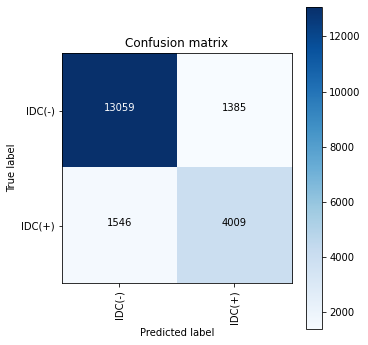

In [50]:
y_pred = new_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testHot,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['IDC (-)','IDC (+)']))

              precision    recall  f1-score   support

     IDC (-)       0.89      0.90      0.90     14444
     IDC (+)       0.74      0.72      0.73      5555

    accuracy                           0.85     19999
   macro avg       0.82      0.81      0.82     19999
weighted avg       0.85      0.85      0.85     19999



In [56]:
# serialize model to JSON
new_model_json = new_model.to_json()
with open("new_model.json", "w") as json_file:
    json_file.write(new_model_json)
# serialize weights to HDF5
new_model.save_weights("new_model.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
gc.collect()

90763

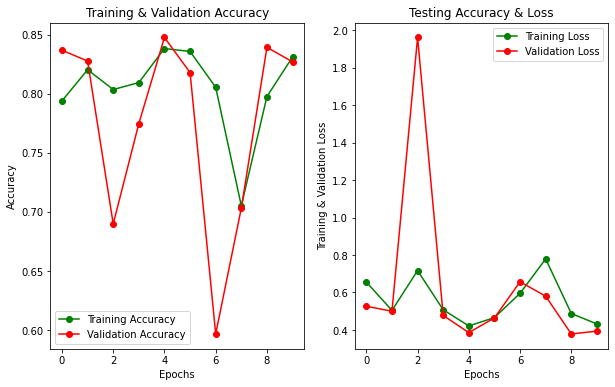

In [58]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10,6)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [57]:
from keras.applications import vgg16

In [58]:
X_train.shape

(24137, 75, 75, 3)

In [59]:
img_rows, img_cols = 75, 75
model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3), pooling='avg')
for layer in model.layers:
    layer.trainable = False

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
______________________________________________________________

In [ ]:
import tensorflow as tf

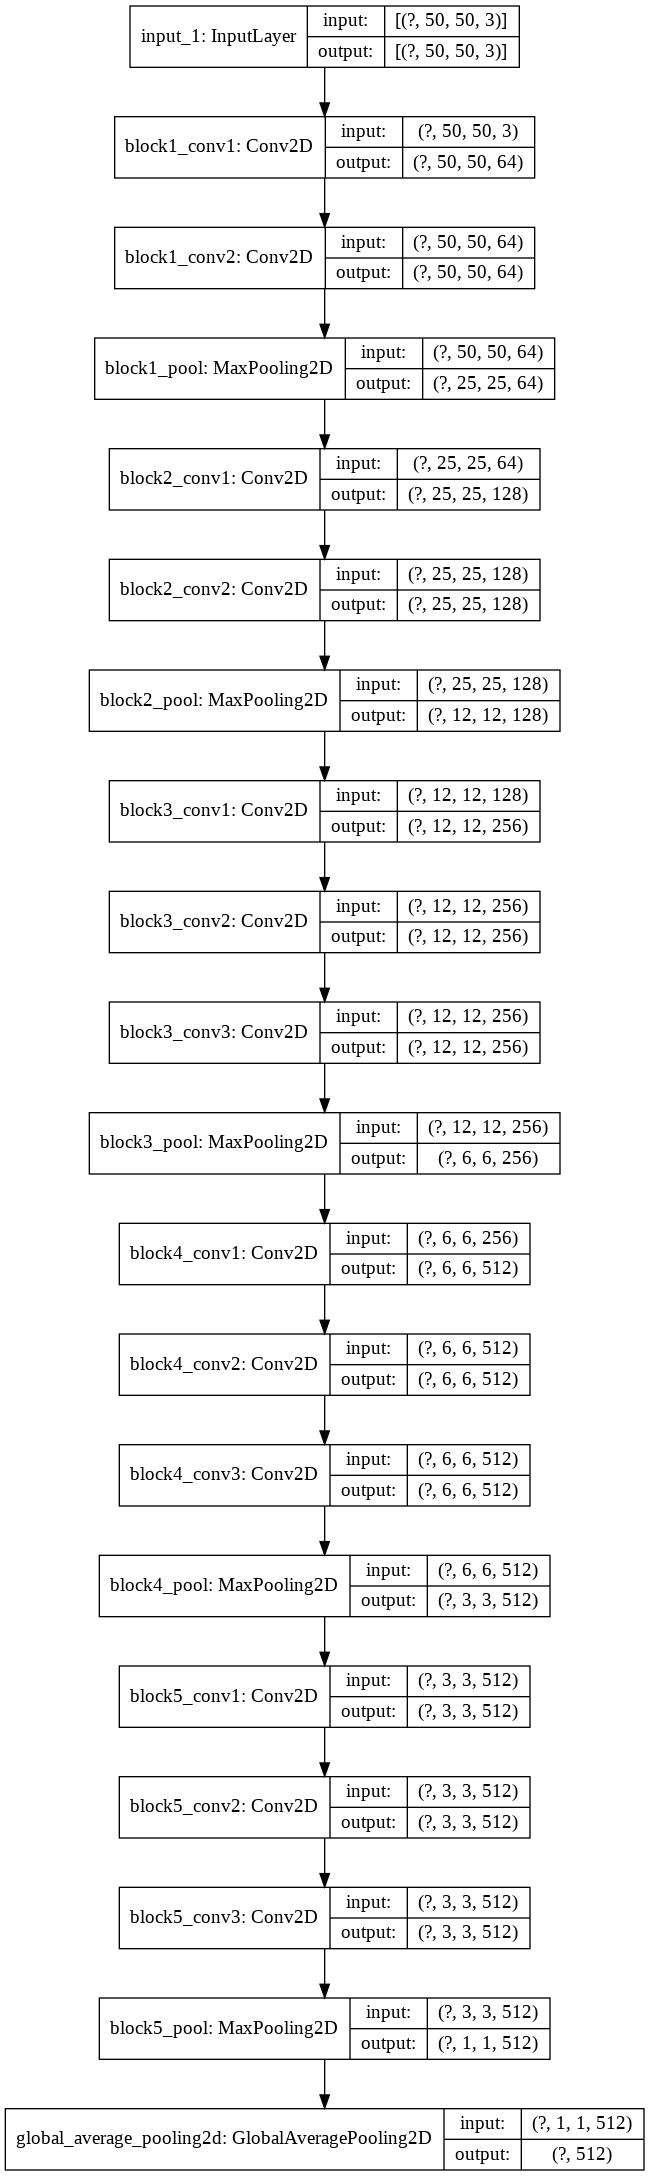

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [60]:
def layer_adder(bottom_model, num_classes):
    top_model = bottom_model.output
    # top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(2, activation='softmax')(top_model)
    return top_model

In [62]:
# pulling together the entire model

# num_classes = 1

FC_Head = layer_adder(model, 2)

model = Model(inputs = model.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)      

In [67]:
checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

earlystop = EarlyStopping(monitor= 'val_loss', min_delta= 0, patience= 3, verbose = 1, restore_best_weights= True)

callbacks = [earlystop, checkpoint]

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])

# nb_train_samples = 6488
# nb_validation_samples = 811

epochs = 20
batch_size = 16

history = model.fit(X_train, y_trainHot, epochs= epochs, validation_data= (X_val, y_valHot))

Epoch 1/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3656 - accuracy: 0.8450 - val_loss: 0.3774 - val_accuracy: 0.8340
Epoch 2/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3588 - accuracy: 0.8461 - val_loss: 0.3770 - val_accuracy: 0.8368
Epoch 3/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3511 - accuracy: 0.8496 - val_loss: 0.3646 - val_accuracy: 0.8428
Epoch 4/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3433 - accuracy: 0.8526 - val_loss: 0.3675 - val_accuracy: 0.8413
Epoch 5/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3369 - accuracy: 0.8590 - val_loss: 0.3597 - val_accuracy: 0.8486
Epoch 6/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3329 - accuracy: 0.8592 - val_loss: 0.3613 - val_accuracy: 0.8454
Epoch 7/20
755/755 [==============================] - 13s 17ms/step - loss: 0.3289 - accuracy: 0.8605 - val_loss: 0.3631 - val_accuracy:

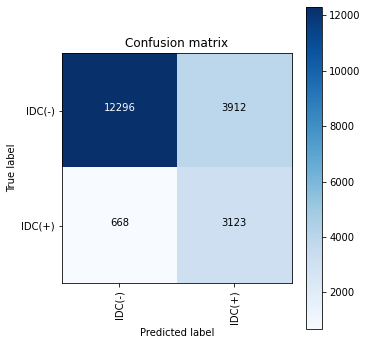

In [68]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testHot,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['IDC (-)','IDC (+)']))

              precision    recall  f1-score   support

     IDC (-)       0.95      0.76      0.84     16208
     IDC (+)       0.44      0.82      0.58      3791

    accuracy                           0.77     19999
   macro avg       0.70      0.79      0.71     19999
weighted avg       0.85      0.77      0.79     19999



In [ ]:
#------------Train The Model----------#
#-------Use SGD with momentum and play with the learning rate and momentum----------#
#------Good Momentum values: 0.9,0.99,0.5----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=2e-4)
model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
history = model.fit(
    X_train, Y_train, 
    validation_data  = (X_val, Y_val),
    epochs = 2
)

Epoch 1/2


ValueError: ignored

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


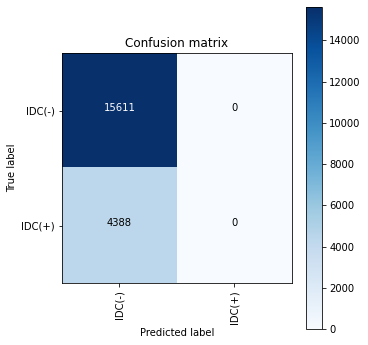

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testHot,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()